In [126]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep


In [127]:
path = "./ED_70_nodes.csv"
dfnodes = pd.read_csv(path, sep=",")

In [128]:
path = "./ED_70_Edges.csv"
dfedges = pd.read_csv(path, sep=",")

In [129]:
nodesList = list(dfnodes.Id)

In [130]:
dfedges.keys()

Index(['Source', 'Target'], dtype='object')

In [131]:
G=nx.Graph()
# Adding nodes
for nodes in nodesList:
    G.add_node(nodes)

# Adding edges
for source,target in zip(list(dfedges.Source),list(dfedges.Target)):
#     print(source,target)
    G.add_edge(source,target)

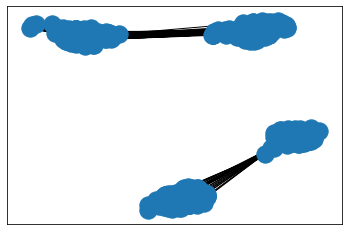

In [132]:
nx.draw_networkx(G,with_labels=False)

In [133]:
# Network topology
G

# Model selection
model = ep.ThresholdModel(G)

# Model Configuration
config = mc.Configuration()
# fraction_infected (0.1,0.2)
config.add_model_parameter('fraction_infected', 0.2)

# Setting node parameters
# Threshold (0.1, 0.25, 0.5, 0.75)
threshold = 0.75
for i in G.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)



100%|██████████| 200/200 [00:00<00:00, 282.25it/s]


In [161]:
FractionInfected = [0.1,0.2]
Threshold = [0.1,0.3]
d = {}
for fraction_infected in FractionInfected:
    for threshold in Threshold:
        model = ep.ThresholdModel(G)
        # Model Configuration
        config = mc.Configuration()
        # fraction_infected (0.1,0.2)
        config.add_model_parameter('fraction_infected', fraction_infected)

        # Setting node parameters
        for i in G.nodes():
            config.add_node_configuration("threshold", i, threshold)

        model.set_initial_status(config)

        # Simulation execution
        iterations = model.iteration_bunch(200)
        key = "Fraction=" + fraction_infected+ " Threshold="+threshold + "200thIteration"
        d[key] = iterations[-1]
#         print("Fraction:{} , Threshold:{}, Iterations_200:{}".format(fraction_infected,threshold,iterations[-1]))
    

100%|██████████| 200/200 [00:00<00:00, 3730.16it/s]


TypeError: must be str, not float

In [159]:
iterations[-1]

{'iteration': 199,
 'status': {},
 'node_count': {0: 312, 1: 77},
 'status_delta': {0: 0, 1: 0}}

		Threshold	
		0.25	0.75
Fraction 	0.1	239.36it	242.60it
	0.2	357.74it	274.29it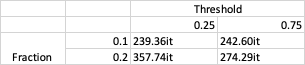

In [160]:
print(type(iterations))
for i in range(0,len(iterations)):
    print(iterations[i])

<class 'list'>
{'iteration': 0, 'status': {'JudgeDread-BigSeven': 0, 'GramParsons-CryOneMoreTime': 1, "HankWilliams-MySweetLoveAin'tAround": 1, "TheKing'sSingers-Can'tBuyMeLove": 0, 'CharlieRich-LifeHasItsLittleUpsAndDowns': 0, 'RosanneCash-TheWheel': 1, 'SteveEarle-FearlessHeart': 0, 'JohnGorka-WhereTheBottlesBreak': 1, "MerleHaggard-It'sNotLove(ButIt'sNotBad)": 0, 'TheHouseOfLove-Ray': 0, 'BlindLemonJefferson-RamblerBlues': 0, 'MethodMan-PerfectWorld': 0, 'NovembersDoom-Awaken': 0, "Nonchalant-5O'Clock": 0, "Ol'DirtyBastard-Gettin'High": 1, 'TheDivineComedy-ThereIsALightThatNeverGoesOut': 1, 'Everlast-SoLong': 0, "ProdigyOfMobbDeep-Don'tBeAFollower": 0, 'RayPrice-HeartachesByTheNumber': 1, 'JohnCale-GhostStory': 0, 'TheLangleySchoolsMusicProject-GodOnlyKnows': 0, 'Hooverphonic-TheLastSupper': 0, 'DaynaKurtz-FredAstaire': 0, 'UncleTupelo-WhiskeyBottle': 0, 'MississippiFredMcDowell-61Highway': 1, 'GillianWelch-OneMonkey': 0, 'HowardShore-CirithUngol': 0, 'JorgeBen-CassiusMarcellusClay'